# GAN Training

<table>
    <tr>
        <th>Discriminator Learning</th>
        <th>Generator Learning</th>
    </tr>
    <tr>
        <th><img src="./images/DLearning.png" align-items="left"></th>
        <th><img src="./images/GLearning.png" align-items="left"></th>
    </tr>
</table>

<img src="./images/training_alg.png" align-items="left">

In [1]:
import import_ipynb
from gan_auxfuncs import *
from gan_nets import GAN_Model

importing Jupyter notebook from gan_auxfuncs.ipynb
importing Jupyter notebook from gan_nets.ipynb


Using TensorFlow backend.


In [2]:
import os
import time
from collections import deque
from keras.optimizers import Adam
import numpy as np


gan_nets.ipynb:118: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`
  "    Options\n",


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1, 1, 100)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 4, 4, 512)         819712    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 512)         2048      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 8, 8, 256)         2097408   
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 256)         0         
__________

gan_nets.ipynb:79: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`
  "<code>kernel_initializer = 'glorot_uniform'</code> _(being used)_ \n",


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      3136      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       131200    
_________________________________________________________________
batch_normalization_8 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 256)       524544    
__________

gan_nets.ipynb:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("mo...)`
  "    <tr>\n",


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 1, 100)         0         
_________________________________________________________________
model_1 (Model)              (None, 256, 256, 3)       3620867   
_________________________________________________________________
model_2 (Model)              (None, 1)                 2891201   
Total params: 6,512,068
Trainable params: 3,618,819
Non-trainable params: 2,893,249
_________________________________________________________________
Begin step:  0


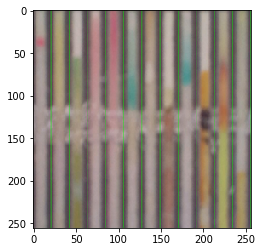

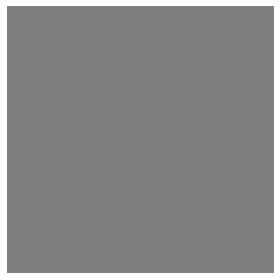

Step 0 completed. Time took: 51 secs.
Begin step:  1
Step 1 completed. Time took: 32 secs.
Begin step:  2
Step 2 completed. Time took: 32 secs.
Begin step:  3
Step 3 completed. Time took: 32 secs.
Begin step:  4
Step 4 completed. Time took: 33 secs.
Begin step:  5
Step 5 completed. Time took: 35 secs.
Begin step:  6
Step 6 completed. Time took: 35 secs.
Begin step:  7
Step 7 completed. Time took: 34 secs.
Begin step:  8
Step 8 completed. Time took: 37 secs.
Begin step:  9
Step 9 completed. Time took: 38 secs.
Begin step:  10


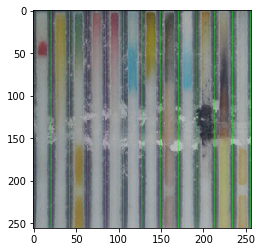

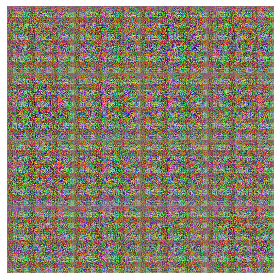

Step 10 completed. Time took: 42 secs.
Begin step:  11
Step 11 completed. Time took: 34 secs.
Begin step:  12
Step 12 completed. Time took: 34 secs.
Begin step:  13
Step 13 completed. Time took: 36 secs.
Begin step:  14
Step 14 completed. Time took: 35 secs.
Begin step:  15
Step 15 completed. Time took: 35 secs.
Begin step:  16
Step 16 completed. Time took: 34 secs.
Begin step:  17
Step 17 completed. Time took: 34 secs.
Begin step:  18
Step 18 completed. Time took: 33 secs.
Begin step:  19
Step 19 completed. Time took: 33 secs.
Begin step:  20


KeyboardInterrupt: 

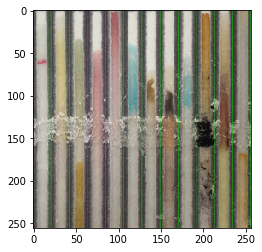

In [3]:
"""
Setup 
"""
# Director parameters
class_dir = '0/'
input_dir = '../../dataset/PADS_256x256_by_class/'
output_dir = 'output_data/log_train/'

# Shape parameters
noise_shape = (1, 1, 100)
image_shape = (256, 256, 3)

# Training parameters
num_steps = 10000
batch_size = 64

# GAN parameters
loss = 'binary_crossentropy'
optimizer_type = Adam(lr = 0.00015, beta_1 = 0.5) #same of G
metrics=['accuracy']

"""
Initialization 
"""
# Initializing variables to track loss function
RD_loss = deque([0], maxlen = 250)     
FD_loss = deque([0], maxlen = 250)
GAN_loss = deque([0], maxlen = 250)

# Initializing dir variables 
script_dir = os.path.abspath('./') # os.path.dirname(__file__) #<-- absolute dir the sc ript is in
data_dir = os.path.abspath(input_dir + class_dir + '*')
img_save_dir = os.path.join(script_dir, output_dir + class_dir)

# Getting GAN model
GAN, G, D = GAN_Model(noise_shape, image_shape, loss, optimizer_type, metrics)
 
"""
Running the training
"""
for step in range(num_steps):
    
    # To track intermediate results
    tot_step = step
    print("Begin step: ", tot_step)
    step_begin_time = time.time()
    
    """
    Discriminator Learning 
    """
    # (1) Freeze G weights
    G.trainable = False
    
    # (2) Unfreeze D weights
    D.trainable = True
    
    # (3) Train D
    # (3.1) Train D with the real samples (set R_X) 
    R_X = sample_from_dataset(batch_size, image_shape, data_dir = data_dir) # Set of real images     
    R_Y = get_noisy_binary_labels(batch_size, True, 0.2) # (values very close to 1.0)
    R_dis_metrics = D.train_on_batch(R_X, R_Y) # training

    # (3.2) Train D with the fake samples (set F_X)
    F_X = G.predict(get_normal_noise_vector(batch_size, noise_shape)) # Set of fake images
    F_Y = get_noisy_binary_labels(batch_size, False, 0.2) # (values very close to 0.0)
    F_dis_metrics = D.train_on_batch(F_X, F_Y) # training
    
    
    """
    Generator Learning
    """
    # (4) Freeze D
    D.trainable = False

    # (5) Unfreeze G
    G.trainable = True

    # (6) Train G by the GAN training
    X = get_normal_noise_vector(batch_size, noise_shape) # Gaussian Noise (mu = 0 sigma = 1) 
    Y = R_Y # (values very close to 1.0) 
    metrics = GAN.train_on_batch(X, Y) # training
    
    
    """
    Intermediate Fake Image Saving
    """
    if (tot_step % 10) == 0:
        step_num = str(tot_step).zfill(4)
        save_img_batch(F_X, img_save_dir + step_num + "_image.png")

    
    """
    Loss Function Tracking and Intermediate Models Saving
    """
    # Loss tracking
    RD_loss.append(R_dis_metrics[0])
    FD_loss.append(F_dis_metrics[0]) 
    GAN_loss.append(metrics[0])
    
    # Time tracking
    end_time = time.time()
    diff_time = int(end_time - step_begin_time)
    
    # Save intermiediate models
    print("Step %d completed. Time took: %s secs." % (tot_step, diff_time))
    if ((tot_step + 1) % 500) == 0:
        
        # Save intermiediate models
        discriminator.trainable = True
        generator.trainable = True
        generator.save(save_model_dir + str(tot_step) + "_G_weights_and_arch.hdf5")
        discriminator.save(save_model_dir + str(tot_step) + "_D_weights_and_arch.hdf5")
        
        # Print Average Loss
        print_average_loss(RD_loss, FD_loss, GAN_loss)
        
        # Intermediate GIF Movie Image Saving
        save_GIF_movie_from_PNG(img_save_dir, str(tot_step))
    